# Homework 6 - Olivier Gilbert - 30/11/2025

## 1.

### a)
I decided to add the columns for the discovery method, including only astrometry, radial velocity, direct imaging, transits,
and microlensing, as they are the only methods we're interested in.

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['xtick.labelsize'] = 16
mpl.rcParams['ytick.labelsize'] = 16
plt.rc("axes", labelsize=16) 

df = pd.read_csv(r"PSCompPars_2025.11.30_08.48.21.csv", skiprows=124)
df = df[df["discoverymethod"].isin(["Radial Velocity","Imaging","Microlensing","Transit","Astrometry"])]
print(df["discoverymethod"].unique())
for col in df.columns:
    if col.startswith("pl") and col.__contains__("mass"):
        print(col) # print the keys to access the mass in Earth masses or Jupiter masses


['Radial Velocity' 'Imaging' 'Microlensing' 'Transit' 'Astrometry']
pl_bmasse
pl_bmasseerr1
pl_bmasseerr2
pl_bmasselim
pl_bmassj
pl_bmassjerr1
pl_bmassjerr2
pl_bmassjlim
pl_bmassprov


### b)

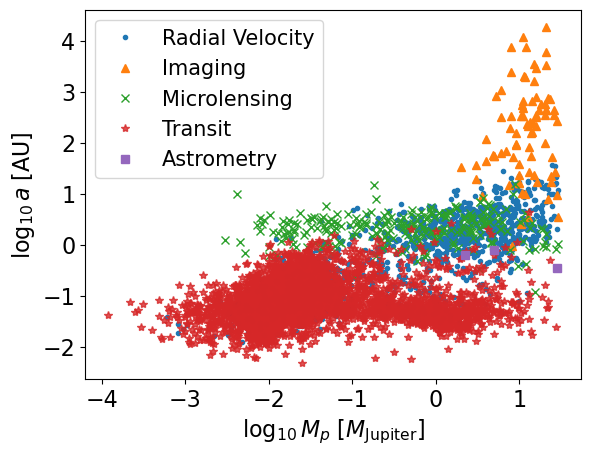

In [25]:
symbols = [".","^","x","*","s"]
for i,detection_method in enumerate(df["discoverymethod"].unique()):
    sub_df = df[df["discoverymethod"] == detection_method]
    pl_masses = sub_df["pl_bmassj"]
    pl_semi_major_axis = sub_df["pl_orbsmax"]

    plt.plot(np.log10(pl_masses), np.log10(pl_semi_major_axis), ls="None", marker=symbols[i], alpha=(1 if detection_method!="Transit" else 0.8), label=detection_method)
plt.xlabel(r"$\log_{10}M_p$ [$M_\mathrm{Jupiter}$]")
plt.ylabel(r"$\log_{10}a$ [AU]")
plt.legend(fontsize=15)
plt.show()